In [1]:
# ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ó‡∏µ‡πà 1 ‡∏ï‡∏¥‡∏î‡∏ï‡∏±‡πâ‡∏á‡πÑ‡∏•‡∏ö‡∏£‡∏≤‡∏£‡∏µ‡∏ó‡∏µ‡πà‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô

In [2]:
!pip install osmnx==1.9.1 folium -q

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 104.3/104.3 kB 2.1 MB/s eta 0:00:00


In [3]:
# ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ó‡∏µ‡πà 2 Import ‡πÅ‡∏•‡∏∞‡∏ï‡∏±‡πâ‡∏á‡∏Ñ‡πà‡∏≤‡∏û‡∏∑‡πâ‡∏ô‡∏ê‡∏≤‡∏ô

In [4]:
import osmnx as ox
import networkx as nx
import folium
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [5]:
ox.settings.use_cache = True
ox.settings.log_console = False

In [6]:
print(f"OSMnx version: {ox.__version__}")
print(f"NetworkX version: {nx.__version__}")

OSMnx version: 1.9.1
NetworkX version: 3.5


In [7]:
# ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ó‡∏µ‡πà 3 ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÅ‡∏ú‡∏ô‡∏ó‡∏µ‡πà‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏Ø

In [40]:
place_name = "Mueang Nakhon Pathom, Nakhon Pathom, Thailand"

- Nodes (intersections): 15,953
- Edges (street segments): 36,034


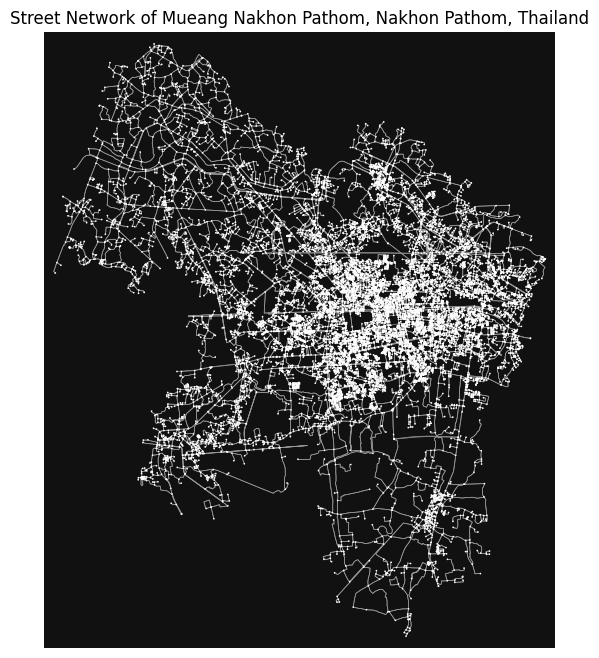

In [41]:
try:
    # ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏Ñ‡∏£‡∏∑‡∏≠‡∏Ç‡πà‡∏≤‡∏¢‡∏ñ‡∏ô‡∏ô‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏Ç‡∏±‡∏ö‡∏£‡∏ñ
    G = ox.graph_from_place(place_name, network_type='drive')

    print(f"- Nodes (intersections): {G.number_of_nodes():,}")
    print(f"- Edges (street segments): {G.number_of_edges():,}")

    fig, ax = ox.plot_graph(G, node_size=1.5, edge_linewidth=0.5, show=False, close=False)
    plt.title(f"Street Network of {place_name}")
    plt.show()

except Exception as e:
    print(f"Error downloading map data: {e}")

In [10]:
# ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ó‡∏µ‡πà 4 ‡∏™‡∏≥‡∏£‡∏ß‡∏à‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏ö‡∏∑‡πâ‡∏≠‡∏á‡∏ï‡πâ‡∏ô

In [42]:
edges = ox.graph_to_gdfs(G, nodes=False)

print("üîç Sample street data (first 5 streets):")
print(edges[['highway', 'length', 'name']].head())

print("\nüìä Types of roads in our graph:")
highway_counts = edges['highway'].value_counts()
print(highway_counts.head(10))

üîç Sample street data (first 5 streets):
                               highway   length           name
u         v          key                                      
268631389 2286464669 0     residential   38.865            NaN
          2286437642 0         primary   42.632  ‡∏ñ‡∏ô‡∏ô‡πÄ‡∏®‡∏£‡∏©‡∏ê‡∏Å‡∏¥‡∏à 2
268631499 8508809475 0         primary  608.453  ‡∏ñ‡∏ô‡∏ô‡πÄ‡∏®‡∏£‡∏©‡∏ê‡∏Å‡∏¥‡∏à 2
          8366677988 0        tertiary   65.310            NaN
268631511 2902182791 0    primary_link   12.619            NaN

üìä Types of roads in our graph:
highway
residential                    26256
unclassified                    7171
tertiary                        1490
primary                          366
trunk                            265
secondary                        244
tertiary_link                     65
trunk_link                        63
primary_link                      45
[unclassified, residential]       20
Name: count, dtype: int64


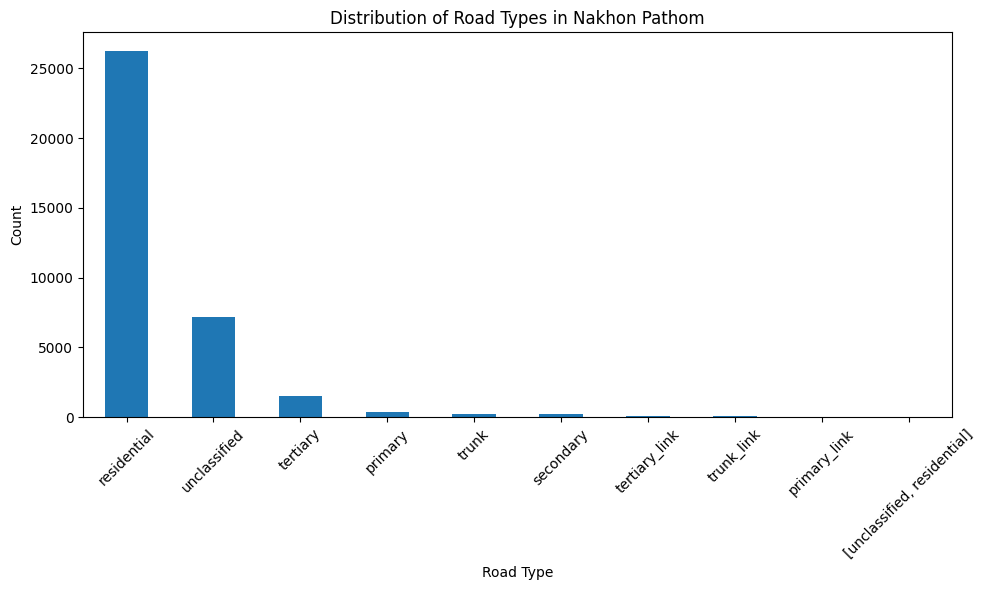

In [44]:
plt.figure(figsize=(10, 6))
highway_counts.head(10).plot(kind='bar')
plt.title("Distribution of Road Types in Nakhon Pathom")
plt.xlabel("Road Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ó‡∏µ‡πà 5 ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏à‡∏∏‡∏î‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏ï‡πâ‡∏ô‡πÅ‡∏•‡∏∞‡∏õ‡∏•‡∏≤‡∏¢‡∏ó‡∏≤‡∏á

In [46]:
start_lat, start_lon = 13.811459919720626, 100.04130302620491
start_name = "Unicomm"

In [45]:
end_lat, end_lon = 13.819586784410731, 100.04255943746058
end_name = "Faculty of Science, Silpakorn University"

In [47]:
#  ‡∏´‡∏≤‡πÇ‡∏´‡∏ô‡∏î‡∏ó‡∏µ‡πà‡πÉ‡∏Å‡∏•‡πâ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î‡∏ö‡∏ô‡∏Å‡∏£‡∏≤‡∏ü
orig_node = ox.nearest_nodes(G, start_lon, start_lat)
dest_node = ox.nearest_nodes(G, end_lon, end_lat)

print(f"üö∂ Starting point: {start_name}")
print(f"   Node ID: {orig_node}")
print(f"üéØ Destination: {end_name}")
print(f"   Node ID: {dest_node}")

üö∂ Starting point: Unicomm
   Node ID: 12782092072
üéØ Destination: Faculty of Science, Silpakorn University
   Node ID: 1123354624


In [48]:
if nx.has_path(G, orig_node, dest_node):
    print("Path exists between origin and destination!")
else:
    print("No path found! Try different locations.")

Path exists between origin and destination!


In [18]:
# ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ó‡∏µ‡πà 6 ‡∏´‡∏≤‡πÄ‡∏™‡πâ‡∏ô‡∏ó‡∏≤‡∏á‡∏ó‡∏µ‡πà‡∏™‡∏±‡πâ‡∏ô‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î‡∏î‡πâ‡∏ß‡∏¢ A*

In [49]:
try:
    # ‡πÉ‡∏ä‡πâ A* algorithm ‡∏´‡∏≤‡πÄ‡∏™‡πâ‡∏ô‡∏ó‡∏≤‡∏á‡∏ó‡∏µ‡πà‡∏™‡∏±‡πâ‡∏ô‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î (‡∏ï‡∏≤‡∏°‡∏£‡∏∞‡∏¢‡∏∞‡∏ó‡∏≤‡∏á)
    shortest_route = nx.astar_path(G, orig_node, dest_node, weight='length')

    # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏£‡∏∞‡∏¢‡∏∞‡∏ó‡∏≤‡∏á‡∏£‡∏ß‡∏°
    route_length = nx.path_weight(G, shortest_route, weight='length')

    print(f"‚úÖ Shortest route found!")
    print(f"üìè Total distance: {route_length:,.0f} meters ({route_length/1000:.2f} km)")
    print(f"üî¢ Number of intersections: {len(shortest_route)}")

except nx.NetworkXNoPath:
    print("‚ùå No path found between these locations!")
except Exception as e:
    print(f"‚ùå Error: {e}")

‚úÖ Shortest route found!
üìè Total distance: 2,348 meters (2.35 km)
üî¢ Number of intersections: 21


In [20]:
# ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ó‡∏µ‡πà 7 ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡πÄ‡∏™‡πâ‡∏ô‡∏ó‡∏≤‡∏á‡∏ö‡∏ô‡πÅ‡∏ú‡∏ô‡∏ó‡∏µ‡πà Interactive

In [50]:
route_map = ox.plot_route_folium(G, shortest_route,
                                  route_color='red',
                                  route_width=5,
                                  route_opacity=0.8)

/tmp/ipython-input-50-562654551.py:1: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  route_map = ox.plot_route_folium(G, shortest_route,


In [51]:
start_marker = folium.Marker(
    location=[start_lat, start_lon],
    popup=f"<b>Start:</b> {start_name}",
    icon=folium.Icon(color='green', icon='play')
)
start_marker.add_to(route_map)

end_marker = folium.Marker(
    location=[end_lat, end_lon],
    popup=f"<b>End:</b> {end_name}",
    icon=folium.Icon(color='red', icon='stop')
)
end_marker.add_to(route_map)

In [52]:
print("üó∫Ô∏è Interactive map (zoom in/out to explore):")
display(route_map)

üó∫Ô∏è Interactive map (zoom in/out to explore):


In [24]:
# ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ó‡∏µ‡πà 8 ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡πÄ‡∏™‡πâ‡∏ô‡∏ó‡∏≤‡∏á

In [53]:
route_edges = ox.utils_graph.route_to_gdf(G, shortest_route, weight='length')

print("üìä Route Analysis:")
print(f"Total segments: {len(route_edges)}")
print(f"\nüõ£Ô∏è Street names used:")

# ‡∏£‡∏ß‡∏ö‡∏£‡∏ß‡∏°‡∏ä‡∏∑‡πà‡∏≠‡∏ñ‡∏ô‡∏ô‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ (‡πÑ‡∏°‡πà‡∏ã‡πâ‡∏≥)
street_names = route_edges['name'].dropna().unique()
for i, street in enumerate(street_names, 1):
    print(f"   {i}. {street}")

# ‡πÅ‡∏™‡∏î‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏†‡∏ó‡∏ñ‡∏ô‡∏ô‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ
print(f"\nüöó Road types used:")
road_types = route_edges['highway'].value_counts()
for road_type, count in road_types.items():
    print(f"   - {road_type}: {count} segments")

üìä Route Analysis:
Total segments: 20

üõ£Ô∏è Street names used:
   1. ‡∏ñ‡∏ô‡∏ô‡∏™‡∏ô‡∏≤‡∏°‡∏à‡∏±‡∏ô‡∏ó‡∏£‡πå
   2. ‡∏ñ‡∏ô‡∏ô‡∏ó‡∏£‡∏á‡∏û‡∏•
   3. ‡∏ñ‡∏ô‡∏ô ‡πÄ‡∏´‡∏ô‡∏∑‡∏≠‡∏ß‡∏±‡∏á
   4. ‡∏ñ‡∏ô‡∏ô‡∏™‡∏∞‡∏û‡∏≤‡∏ô‡πÇ‡∏¢‡∏á

üöó Road types used:
   - unclassified: 9 segments
   - tertiary: 5 segments
   - residential: 4 segments
   - secondary: 2 segments


In [26]:
# ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ó‡∏µ‡πà 9 ‡∏•‡∏≠‡∏á‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏à‡∏∏‡∏î‡∏õ‡∏•‡∏≤‡∏¢‡∏ó‡∏≤‡∏á

In [62]:
new_end_lat, new_end_lon =13.805996708121137, 100.04985713078138
new_end_name = "Central Nakhon Pathom"

print(f"üéØ New destination: {new_end_name}")

üéØ New destination: Central Nakhon Pathom


In [63]:
new_dest_node = ox.nearest_nodes(G, new_end_lon, new_end_lat)
new_route = nx.astar_path(G, orig_node, new_dest_node, weight='length')
new_length = nx.path_weight(G, new_route, weight='length')

print(f"üìè Distance to new destination: {new_length:,.0f} meters ({new_length/1000:.2f} km)")
print(f"üìä Difference: {abs(new_length - route_length):,.0f} meters")

üìè Distance to new destination: 1,362 meters (1.36 km)
üìä Difference: 986 meters


In [64]:
comparison_map = ox.plot_route_folium(G, shortest_route,
                                      route_color='red',
                                      route_width=4,
                                      route_opacity=0.7)

comparison_map = ox.plot_route_folium(G, new_route,
                                      route_map=comparison_map,
                                      route_color='blue',
                                      route_width=4,
                                      route_opacity=0.7)

/tmp/ipython-input-64-2900661045.py:1: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  comparison_map = ox.plot_route_folium(G, shortest_route,
/tmp/ipython-input-64-2900661045.py:6: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  comparison_map = ox.plot_route_folium(G, new_route,


In [65]:
folium.Marker([start_lat, start_lon],
              popup=f"<b>Start:</b> {start_name}",
              icon=folium.Icon(color='green')).add_to(comparison_map)

folium.Marker([end_lat, end_lon],
              popup=f"<b>Destination 1:</b> {end_name}",
              icon=folium.Icon(color='red')).add_to(comparison_map)

folium.Marker([new_end_lat, new_end_lon],
              popup=f"<b>Destination 2:</b> {new_end_name}",
              icon=folium.Icon(color='blue')).add_to(comparison_map)

print("\nüó∫Ô∏è Comparison map (Red = Or Tor Kor, Blue = Central Ladprao):")
display(comparison_map)


üó∫Ô∏è Comparison map (Red = Or Tor Kor, Blue = Central Ladprao):


In [66]:
help(ox.graph_from_place)

Help on function graph_from_place in module osmnx.graph:

graph_from_place(query, network_type='all_private', simplify=True, retain_all=False, truncate_by_edge=False, which_result=None, buffer_dist=None, clean_periphery=None, custom_filter=None)
    Download and create a graph within the boundaries of some place(s).
    
    The query must be geocodable and OSM must have polygon boundaries for the
    geocode result. If OSM does not have a polygon for this place, you can
    instead get its street network using the graph_from_address function,
    which geocodes the place name to a point and gets the network within some
    distance of that point.
    
    If OSM does have polygon boundaries for this place but you're not finding
    it, try to vary the query string, pass in a structured query dict, or vary
    the which_result argument to use a different geocode result. If you know
    the OSM ID of the place, you can retrieve its boundary polygon using the
    geocode_to_gdf function,

In [32]:
# ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ó‡∏µ‡πà 10 ‡πÄ‡∏û‡∏¥‡πà‡∏° "travel time" ‡πÄ‡∏õ‡πá‡∏ô weight ‡πÅ‡∏ó‡∏ô distance

In [67]:
# Define estimated travel speeds for different road types in km/h
speed_kmph = {
    'residential': 30,  # Typical speed in residential areas
    'unclassified': 30, # Similar to residential
    'tertiary': 40,     # Medium speed urban roads
    'secondary': 50,    # Arterial roads
    'primary': 60,      # Major urban roads
    'trunk': 70,        # Major highways/expressways within urban area
    'motorway': 90,     # High-speed expressways
    'living_street': 10,# Very low speed
    'service': 20,      # Service roads, alleys
    'road': 30,         # General unclassified roads
    'primary_link': 60, # Links to primary roads
    'secondary_link': 50,# Links to secondary roads
    'tertiary_link': 40, # Links to tertiary roads
    'trunk_link': 70,   # Links to trunk roads
    'motorway_link': 90 # Links to motorways
}

print("Estimated speeds (km/h) by road type")
for highway_type, speed in speed_kmph.items():
    print(f"  {highway_type}: {speed}")

Estimated speeds (km/h) by road type
  residential: 30
  unclassified: 30
  tertiary: 40
  secondary: 50
  primary: 60
  trunk: 70
  motorway: 90
  living_street: 10
  service: 20
  road: 30
  primary_link: 60
  secondary_link: 50
  tertiary_link: 40
  trunk_link: 70
  motorway_link: 90


In [34]:
# ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ó‡∏µ‡πà 11 ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ô travel time

In [68]:
# Convert speed from km/h to meters per second
speed_mps = {highway_type: speed * 1000 / 3600 for highway_type, speed in speed_kmph.items()}

# Add 'speed_mps' attribute to edges based on 'highway' type
G = ox.add_edge_speeds(G, speed_mps)

# Calculate and add 'travel_time' attribute to edges
G = ox.add_edge_travel_times(G)

In [36]:
# ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ó‡∏µ‡πà 12 shortest path ‡∏à‡∏≤‡∏Å time

In [69]:
# ‡πÉ‡∏ä‡πâ A* algorithm ‡∏´‡∏≤‡πÄ‡∏™‡πâ‡∏ô‡∏ó‡∏≤‡∏á‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡πÄ‡∏ß‡∏•‡∏≤‡∏ô‡πâ‡∏≠‡∏¢‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î
shortest_route_time = nx.astar_path(G, orig_node, dest_node, weight='travel_time')

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡πÄ‡∏ß‡∏•‡∏≤‡∏Å‡∏≤‡∏£‡πÄ‡∏î‡∏¥‡∏ô‡∏ó‡∏≤‡∏á‡∏£‡∏ß‡∏°
route_time = nx.path_weight(G, shortest_route_time, weight='travel_time')

print(f"‚è∞ Estimated total travel time: {route_time:.2f} seconds ({route_time/60:.2f} minutes)")
print(f"Number of intersections: {len(shortest_route_time)}")

‚è∞ Estimated total travel time: 947.60 seconds (15.79 minutes)
Number of intersections: 21


In [38]:
# ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏Å‡∏≤‡∏£‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏£‡πá‡∏ß‡πÉ‡∏´‡πâ‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÄ‡∏™‡πâ‡∏ô‡∏ó‡∏≤‡∏á

In [70]:
# u, v, key ‡∏Ñ‡∏∑‡∏≠‡∏ï‡∏±‡∏ß‡∏£‡∏∞‡∏ö‡∏∏‡πÄ‡∏™‡πâ‡∏ô‡∏ñ‡∏ô‡∏ô ‡πÅ‡∏•‡∏∞ 'speed_mps_actual' ‡∏Ñ‡∏∑‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏£‡πá‡∏ß‡∏à‡∏£‡∏¥‡∏á‡πÉ‡∏ô‡∏´‡∏ô‡πà‡∏ß‡∏¢ ‡πÄ‡∏°‡∏ï‡∏£‡∏ï‡πà‡∏≠‡∏ß‡∏¥‡∏ô‡∏≤‡∏ó‡∏µ
data = {
    'u': [85753778, 105838415, 105838415, 9444510080, 2197616325],
    'v': [1893839406, 1817818994, 8107214608, 2197616325, 9444510080],
    'key': [0, 0, 0, 0, 0],
    'speed_mps_actual': [15.2, 12.5, 5.0, 10.0, 9.5]
}

df_speeds_actual = pd.DataFrame(data)

display(df_speeds_actual)

u           v  key  speed_mps_actual
0    85753778  1893839406    0              15.2
1   105838415  1817818994    0              12.5
2   105838415  8107214608    0               5.0
3  9444510080  2197616325    0              10.0
4  2197616325  9444510080    0               9.5